In [1]:
# Data Go Through 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 


In [2]:
data = pd.read_csv('raw_data/ncr_ride_bookings.csv')
data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
#column types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [4]:
#categorize column types 
#date
column_date =['Date','Time']
column_object = ['Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Cancelled Rides by Customer',
                 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason',
                 'Incomplete Rides', 'Incomplete Rides Reason', 'Payment Method']
column_numeric = ['Avg VTAT', 'Avg CTAT','Booking Value	Ride Distance',	'Driver Ratings	Customer Rating']

#Average Vehicle Time at Arrival Avg VTAT
#Average Customer Time at Arrival Avg CTAT
#conver date column 
data['Date']= pd.to_datetime(data['Date'], format="%Y-%m-%d")
data['Time']= pd.to_datetime(data['Time'], format="%H:%M:%S").dt.time


In [5]:
data['Date'].min()
data['Date'].max()

#data only contains info in 2024

Timestamp('2024-12-30 00:00:00')

EDA 

In [6]:
df =data.copy()

df.info()
df.head()
df.describe(include="all")  # summary for both numeric and categorical
df.isnull().sum()           # missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [7]:
df['Booking Status'].value_counts(normalize=True)
#df['Vehicle Type'].value_counts()
#df['Payment Method'].value_counts()

Booking Status
Completed                0.62
Cancelled by Driver      0.18
No Driver Found          0.07
Cancelled by Customer    0.07
Incomplete               0.06
Name: proportion, dtype: float64

In [8]:
df[['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']].describe()
#df['Ride Distance'].hist(bins=30)
#df['Booking Value'].hist(bins=30)

,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,102000.000000,102000.000000,93000.000000,93000.000000
mean,508.295912,24.637012,4.230992,4.404584
std,395.805774,14.002138,0.436871,0.437819
min,50.000000,1.000000,3.000000,3.000000
25%,234.000000,12.460000,4.100000,4.200000
50%,414.000000,23.720000,4.300000,4.500000
75%,689.000000,36.820000,4.600000,4.800000
max,4277.000000,50.000000,5.000000,5.000000


In [9]:
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + " " + df['Time'].astype(str))
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month

In [10]:
df['Pickup Location'].unique()

array(['Palam Vihar', 'Shastri Nagar', 'Khandsa', 'Central Secretariat',
       'Ghitorni Village', 'AIIMS', 'Vaishali', 'Mayur Vihar',
       'Noida Sector 62', 'Rohini', 'Udyog Bhawan', 'Vidhan Sabha',
       'Patel Chowk', 'Malviya Nagar', 'Madipur', 'Jama Masjid',
       'IGI Airport', 'Vinobapuri', 'Kashmere Gate', 'Pitampura',
       'Punjabi Bagh', 'Greater Noida', 'Tis Hazari', 'Noida Sector 18',
       'Kanhaiya Nagar', 'Okhla', 'Cyber Hub', 'Sadar Bazar Gurgaon',
       'Shastri Park', 'Faridabad Sector 15', 'Qutub Minar', 'Mundka',
       'DLF City Court', 'New Colony', 'Nirman Vihar',
       'New Delhi Railway Station', 'Civil Lines Gurgaon', 'Seelampur',
       'Noida Extension', 'Adarsh Nagar', 'Panipat', 'Karol Bagh',
       'Sultanpur', 'Moti Nagar', 'Dilshad Garden', 'Aya Nagar',
       'Rajiv Chowk', 'MG Road', 'Jasola', 'Ardee City', 'Meerut',
       'Anand Vihar ISBT', 'Lajpat Nagar', 'Tughlakabad', 'Karkarduma',
       'Dwarka Mor', 'Anand Vihar', 'Uttam Nagar', 'M

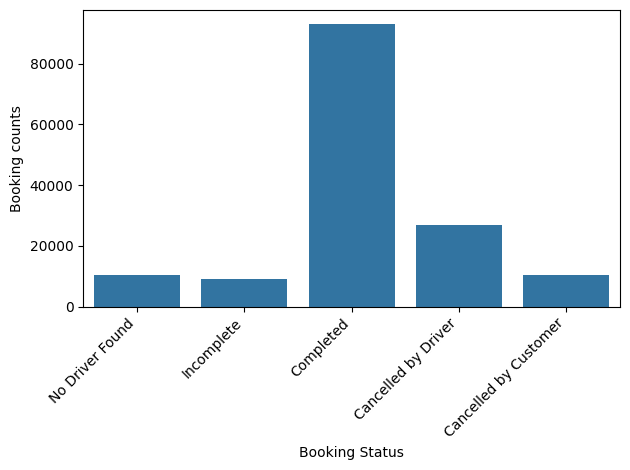

In [11]:
import seaborn as sns

sns.countplot(x = 'Booking Status', data = df)
plt.ylabel("Booking counts", rotation=90)
plt.xticks(rotation=45, ha='right')   # rotate labels 45° (or 90°) and align
plt.tight_layout() 

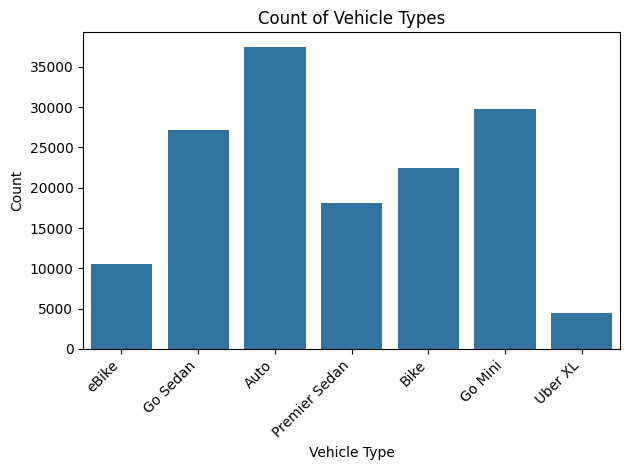

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Vehicle Type', data=df)

plt.ylabel("Count", rotation=90)   # rotate y-axis label to vertical
plt.xlabel("Vehicle Type")        # optional: set x-axis label
plt.title("Count of Vehicle Types")  # optional: add title
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Pickup and Dropoff Info showing on Maps

In [13]:
#merge lat&Long dataset with main dataset
lat_long = pd.read_csv('raw_data/India Cities LatLng.csv')
lat_long.head()


,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Delhi,28.6600,77.2300,India,IN,Delhi,admin,29617000.0,16753235.0
1,Mumbai,18.9667,72.8333,India,IN,Mahārāshtra,admin,23355000.0,12478447.0
2,Kolkāta,22.5411,88.3378,India,IN,West Bengal,admin,17560000.0,4496694.0
3,Bangalore,12.9699,77.5980,India,IN,Karnātaka,admin,13707000.0,8443675.0
4,Chennai,13.0825,80.2750,India,IN,Tamil Nādu,admin,11324000.0,6727000.0


In [14]:
#merge by pick_up location
df_merged = data.merge(lat_long, how='left', left_on='Pickup Location', right_on='City')
df_merged = df_merged.rename(columns={'Latitude': 'Pickup Latitude', 'Longitude': 'Pickup Longitude'})
df.head()

KeyError: 'City'

In [15]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="uber_india_map")

location = geolocator.geocode("Palam Vihar, Gurgaon, Haryana, India")

if location:
    print("address:", location.address)
    print("Lat:", location.latitude)
    print("Long:", location.longitude)
else:
    print("Cannot find")

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Palam+Vihar%2C+Gurgaon%2C+Haryana%2C+India&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))